In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def align_sizes(img_real, img_fake):
    height, width, _ = img_fake.shape
    return cv2.resize(img_real, (height, width)), img_fake


path_real = "./testB/7-6-90AD30-B-C363BC-3+3.ihc.jpg"
path_fake = "./results/7-6-90AD30-B-C363BC-3+3.he_fake.png"

img_real = cv2.imread(path_real)
img_fake = cv2.imread(path_fake)

img_real, img_fake = align_sizes(img_real, img_fake)

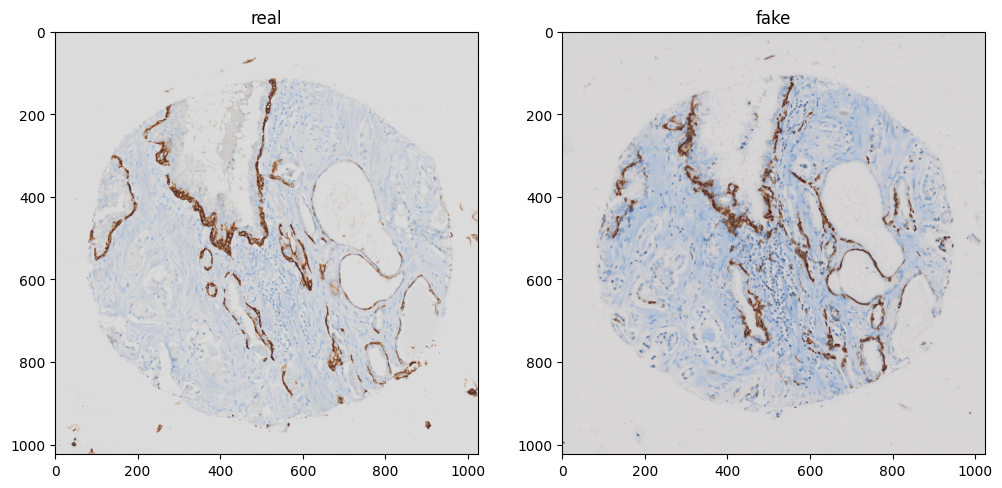

In [3]:
img_real_rgb =  cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
img_fake_rgb =  cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), dpi= 100)

ax1.imshow(img_real_rgb)
ax1.set_title("real")
ax2.imshow(img_fake_rgb)
ax2.set_title("fake")

plt.show()

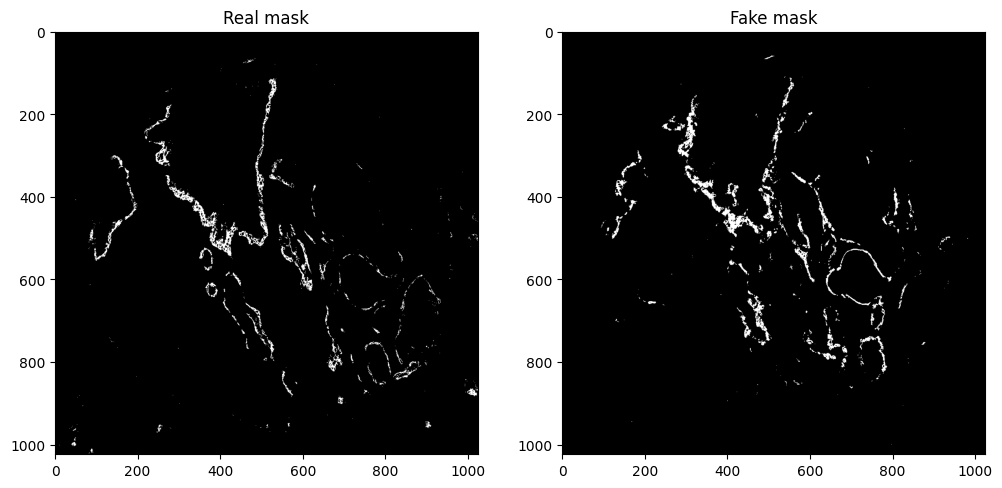

In [5]:
img_real_hsv =  cv2.cvtColor(img_real, cv2.COLOR_BGR2HSV)
img_fake_hsv =  cv2.cvtColor(img_fake, cv2.COLOR_BGR2HSV)

upper_brown = np.array([25, 255, 155], dtype=np.uint8)
lower_brown = np.array([1,1,1], dtype=np.uint8)

mask_real = cv2.inRange(img_real_hsv, lower_brown, upper_brown)
mask_fake = cv2.inRange(img_fake_hsv, lower_brown, upper_brown)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8), dpi= 100)

ax1.imshow(mask_real, cmap="gray")
ax1.set_title("Real mask")
ax2.imshow(mask_fake, cmap="gray")
ax2.set_title("Fake mask")

plt.show()

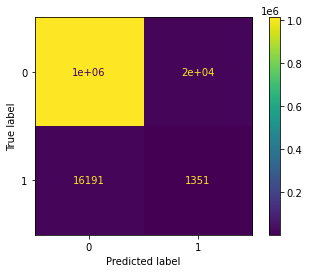

In [6]:
mask_real = mask_real.flatten()
mask_fake = mask_fake.flatten()

mask_real[mask_real > 0] = 1
mask_fake[mask_fake > 0] = 1

confusion_matrix = confusion_matrix(mask_real, mask_fake)
TN, FP, FN, TP = confusion_matrix.ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
disp.plot()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(mask_real, mask_fake))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1031034
           1       0.06      0.08      0.07     17542

    accuracy                           0.97   1048576
   macro avg       0.52      0.53      0.53   1048576
weighted avg       0.97      0.97      0.97   1048576

